In [1]:
#Some necessary stuff for the code below

from Per import *

def simulation(series,name_serie,rN,rm,rb):
    
    import time
    import pandas as pd
    
    res=[]
    for nn in rN:
        for name,serie in zip(name_serie,series):
            serie=serie[:int(round(nn))]
            for m in rm:
                for b in rb:
                    time0=time.time()
                    res.append((name,len(serie),b,m,PE(serie,m,b),len(serie)/np.math.factorial(m),time.time()-time0))

        print(res[-1])
    res_m=np.array(res)
    lms=pd.DataFrame(res_m,columns=['serie','N','b','m','PE','N/m!','t'])
    lms['b']=lms['b'].astype(np.integer)
    lms['m']=lms['m'].astype(np.integer)
    lms['PE']=lms['PE'].astype(np.float)
    lms['N/m!']=lms['N/m!'].astype(np.float)
    lms['t']=lms['t'].astype(np.float)
    lms['H']=np.log(lms['m'].apply(np.math.factorial))-lms['PE']
    lms['N']=(lms['N']).astype(np.integer)
    return lms

def select(sec,data):
    res=data.copy()
    for col,cond in sec:
        res=res[res[col] == cond]
    return res
        

[Blood Pressure in Salt-Sensitive Dahl Rats](https://www.physionet.org/content/bpssrat/1.0.0/)


Reading data

In [2]:
PATH='Permutation/data/blood-pressure-in-salt-sensitive-dahl-rats-1.0.0/'


In [16]:
%%time
lmb=[]
res=[]
for name in ['SS_LS.txt','SS_HS.txt','SSBN13_LS.txt','SSBN13_HS.txt']:
    raw=open(PATH+name)

    raw=[item.strip('\n').split('\t') for item in raw if len(item)>1 and not '//' in item ]
    raw=[[float(val) for val in item] for item in raw]


    series=[]
    for _ in range(len(raw[0])):
        series.append([])
    for item in raw:
        for indx,val in enumerate(item):
            series[indx].append(val)


    name_serie=['{}{}'.format(name.split('.')[0],item) for item in range(len(series))]
    res.append(simulation(series,name_serie,[len(series[0])],[3,5,8],range(1,100)))
res

('SS_LS8', 12000, 99, 8, 8.073299793852291, 0.2976190476190476, 0.022937536239624023)
('SS_HS8', 12000, 99, 8, 7.962154962881265, 0.2976190476190476, 0.022707462310791016)
('SSBN13_LS5', 12000, 99, 8, 8.336624823068385, 0.2976190476190476, 0.02327418327331543)
('SSBN13_HS5', 12000, 99, 8, 7.613952525127899, 0.2976190476190476, 0.02383136749267578)
CPU times: user 2min 30s, sys: 27.8 ms, total: 2min 30s
Wall time: 2min 30s


[       serie      N   b  m        PE         N/m!         t         H
 0     SS_LS0  12000   1  3  0.850503  2000.000000  0.012370  0.941257
 1     SS_LS0  12000   2  3  1.076004  2000.000000  0.012387  0.715756
 2     SS_LS0  12000   3  3  1.238576  2000.000000  0.012144  0.553183
 3     SS_LS0  12000   4  3  1.351216  2000.000000  0.012789  0.440543
 4     SS_LS0  12000   5  3  1.402545  2000.000000  0.012979  0.389214
 ...      ...    ...  .. ..       ...          ...       ...       ...
 2668  SS_LS8  12000  95  8  8.208970     0.297619  0.023134  2.395633
 2669  SS_LS8  12000  96  8  8.060403     0.297619  0.025234  2.544200
 2670  SS_LS8  12000  97  8  8.106093     0.297619  0.023143  2.498509
 2671  SS_LS8  12000  98  8  8.170510     0.297619  0.023221  2.434093
 2672  SS_LS8  12000  99  8  8.073300     0.297619  0.022938  2.531303
 
 [2673 rows x 8 columns],
        serie      N   b  m        PE         N/m!         t         H
 0     SS_HS0  12000   1  3  0.970100  2000.00000

Graph for 4 categories at once

Select m value

In [13]:

print(lmb.m.unique())
m=8

[3 5 8]


<IPython.core.display.Javascript object>


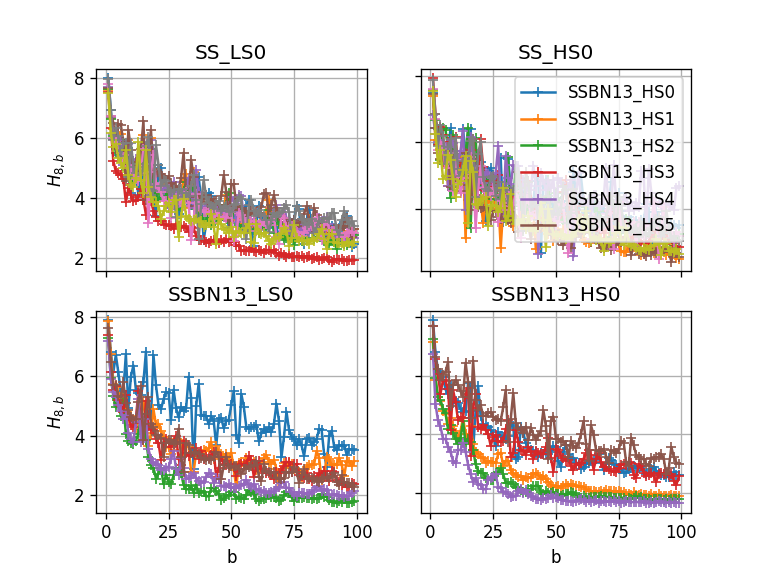

In [22]:

fig, axs = plt.subplots(2, 2)


lms=res[0]
mn=float('inf')
mx=-float('inf')

for serie in lms.serie.unique():
    
   
    
    sec=select([('serie',serie),('m',m)],lms)
    sec=sec[sec['N']>0.9*lms.N.max()]
    X=sec['b']
    mn=min(mn,X.min())
    mx=max(mx,X.max())
    y=sec['H']
    #color=['red','green','blue'][int(m/4)-1]
    
    axs[0,0].plot((X),(y),marker='+')
    


#axs[0,0].xlabel('$b$')
#plt.xscale('log')
#axs[0,0].ylabel('$H_{m,b}$')
#plt.yscale('log')
#axs[0,0].legend(lms.serie.unique())
axs[0,0].set_title(lms.serie.unique()[0])

axs[0,0].grid()

lms=res[1]
mn=float('inf')
mx=-float('inf')

for serie in lms.serie.unique():
    
   
    
    sec=select([('serie',serie),('m',m)],lms)
    sec=sec[sec['N']>0.9*lms.N.max()]
    X=sec['b']
    mn=min(mn,X.min())
    mx=max(mx,X.max())
    y=sec['H']
    #color=['red','green','blue'][int(m/4)-1]
    
    axs[0,1].plot((X),(y),marker='+')
    


#axs[0,1].xlabel('$b$')
#plt.xscale('log')
#axs[0,1].ylabel('$H_{m,b}$')
#plt.yscale('log')
#axs[0,1].legend(lms.serie.unique())
axs[0,1].set_title(lms.serie.unique()[0])

axs[0,1].grid()

lms=res[2]
mn=float('inf')
mx=-float('inf')

for serie in lms.serie.unique():
    
   
    
    sec=select([('serie',serie),('m',m)],lms)
    sec=sec[sec['N']>0.9*lms.N.max()]
    X=sec['b']
    mn=min(mn,X.min())
    mx=max(mx,X.max())
    y=sec['H']
    #color=['red','green','blue'][int(m/4)-1]
    
    axs[1,0].plot((X),(y),marker='+')
    


#axs[1,0].xlabel('$b$')
#plt.xscale('log')
#axs[1,0].ylabel('$H_{m,b}$')
#plt.yscale('log')
#axs[1,0].legend(lms.serie.unique())
axs[1,0].set_title(lms.serie.unique()[0])

axs[1,0].grid()

lms=res[3]
mn=float('inf')
mx=-float('inf')

for serie in lms.serie.unique():
    
   
    
    sec=select([('serie',serie),('m',m)],lms)
    sec=sec[sec['N']>0.9*lms.N.max()]
    X=sec['b']
    mn=min(mn,X.min())
    mx=max(mx,X.max())
    y=sec['H']
    #color=['red','green','blue'][int(m/4)-1]
    
    axs[1,1].plot((X),(y),marker='+')
    


#axs[1,1].xlabel('$b$')
#plt.xscale('log')
#axs[1,1].ylabel('$H_{m,b}$')
#plt.yscale('log')
#axs[1,1].legend(lms.serie.unique())
axs[1,1].set_title(lms.serie.unique()[0])

axs[1,1].grid()

axs[0,1].legend(lms.serie.unique())

for ax in axs.flat:
    ax.set(xlabel='b', ylabel='$H_{%i,b}$' % m)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()



In [26]:
name_serie

['SSBN13_HS0',
 'SSBN13_HS1',
 'SSBN13_HS2',
 'SSBN13_HS3',
 'SSBN13_HS4',
 'SSBN13_HS5']

Selecting one category {SS_L, SS_H, SSBN13_LS, SSBM13_HS}

In [34]:

lmb=res[3]

Select one of m possible values

In [35]:
print(lmb.m.unique())
m=5

[3 5 8]


<IPython.core.display.Javascript object>


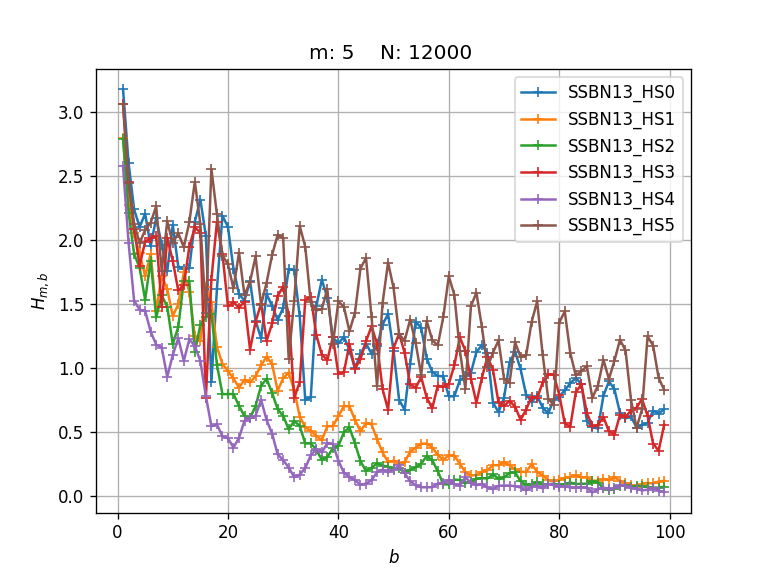

In [36]:
mn=float('inf')
mx=-float('inf')

for serie in lmb.serie.unique():
    
   
    
    sec=select([('serie',serie),('m',m)],lmb)
    sec=sec[sec['N']>0.9*lmb.N.max()]
    X=sec['b']
    mn=min(mn,X.min())
    mx=max(mx,X.max())
    y=sec['H']
    #color=['red','green','blue'][int(m/4)-1]
    
    plt.plot((X),(y),marker='+')
    


plt.xlabel('$b$')
#plt.xscale('log')
plt.ylabel('$H_{m,b}$')
#plt.yscale('log')
plt.legend(lmb.serie.unique())
plt.title('m: %i    N: %g ' % (m,round(sec['N'].max())))

plt.grid()

plt.show()

encephalogram data from kaggle

In [40]:
PATH='Permutation/data/'
raw=open(PATH+'S2_nm_sample.csv','r').readlines()


In [41]:
cols=raw.pop(0).strip('\n').split(',')
dat=[item.strip('\n').split(',') for item in raw]
dat=[[int(a),b,int(c),float(d),f,g,int(h),i,float(j)] for a,b,c,d,f,g,h,i,j in dat]

In [42]:
data=pd.DataFrame(dat,columns=cols)
data

,trial number,sensor position,sample num,sensor value,subject identifier,matching condition,channel,name,time
0,13,FP1,0,3.947,a,S2 nomatch,0,co2a0000369,0.000000
1,13,FP1,1,4.924,a,S2 nomatch,0,co2a0000369,0.003906
2,13,FP1,2,4.924,a,S2 nomatch,0,co2a0000369,0.007812
3,13,FP1,3,4.435,a,S2 nomatch,0,co2a0000369,0.011719
4,13,FP1,4,3.947,a,S2 nomatch,0,co2a0000369,0.015625
...,...,...,...,...,...,...,...,...,...
31227,5,CPZ,251,-9.471,c,S2 nomatch,61,co2c0000340,0.980469
31228,5,CPZ,252,-8.982,c,S2 nomatch,61,co2c0000340,0.984375
31229,5,CPZ,253,-8.982,c,S2 nomatch,61,co2c0000340,0.988281
31230,5,CPZ,254,-9.471,c,S2 nomatch,61,co2c0000340,0.992188


In [43]:
data.drop(['subject identifier'],inplace=True,axis=1)

In [44]:
for col in data.columns:
    if data[col].dtype=='object':
        print(col,data[col].unique())

sensor position ['FP1' 'FP2' 'F7' 'F8' 'AF3' 'AF4' 'FZ' 'F4' 'F3' 'FC6' 'FC5' 'FC2' 'FC1'
 'T8' 'T7' 'CZ' 'C3' 'C4' 'CP5' 'CP6' 'CP1' 'CP2' 'P3' 'P4' 'PZ' 'P8' 'P7'
 'PO4' 'PO3' 'O2' 'O1' 'AF7' 'AF8' 'F5' 'F6' 'FT7' 'FT8' 'FPZ' 'FC4' 'FC3'
 'C6' 'C5' 'F2' 'F1' 'TP8' 'TP7' 'AFZ' 'CP3' 'CP4' 'P5' 'P6' 'C1' 'C2'
 'PO7' 'PO8' 'FCZ' 'POZ' 'OZ' 'P2' 'P1' 'CPZ']
matching condition ['S2 nomatch']
name ['co2a0000369' 'co2c0000340']


The data

<IPython.core.display.Javascript object>


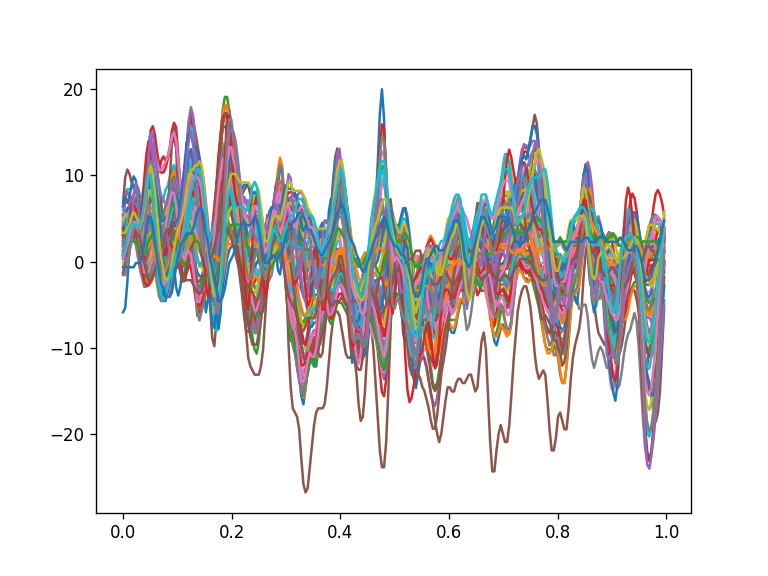

(256,)


In [54]:
sec=data[data['name']=='co2a0000369']
for sp in sec['sensor position'].unique():
    X=sec[sec['sensor position']==sp]['time']
    y=sec[sec['sensor position']==sp]['sensor value']
    plt.plot(X,y)
print(y.shape)

In [46]:


res=[]


m=5
N=256
for name in data['name'].unique():
    
    for sp in data['sensor position'].unique():
        sec=data[data['sensor position']==sp]
        sec=sec[sec['name']==name]
        for b in range(1,101):
            res.append([name,sp,b,PE(np.array(sec['sensor value']),m,b)])
res=pd.DataFrame(res,columns=['name','pos','tau','PE'])

In [47]:
#Select one location
name=res['name'].unique()[0]

<IPython.core.display.Javascript object>


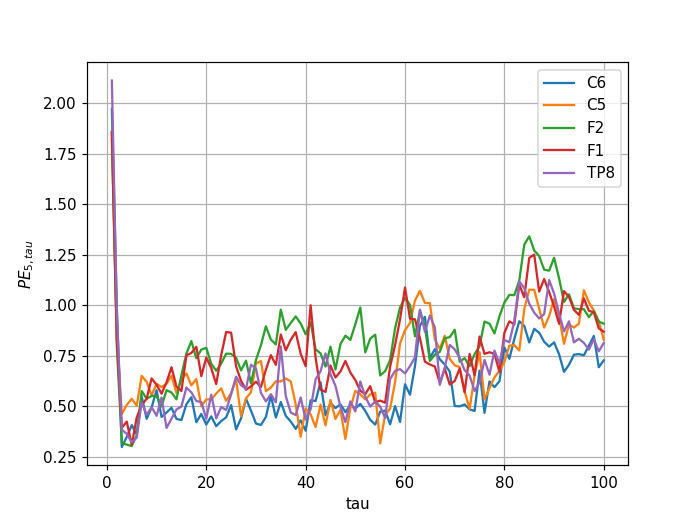

In [57]:
sec=res[(res['name']==name)]#res[(res['pos']==sp) & (res['name']==name)]
nms=sec['pos'].unique()[40:45]
for sp in nms:
    #print(sp)
    X=sec[sec.pos==sp].tau
    y=4.7875-sec[sec.pos==sp].PE

    plt.plot(X,y)
plt.grid()
plt.xlabel('tau')
plt.ylabel('$PE_{5,tau}$')
plt.legend(nms)

Would some kind of euclidean distance help?

In [58]:
n=[]
v=[]
for name in res.name.unique():
    for sp in res.pos.unique():
        n.append(['A' if 'a' in name else 'B',sp])
        v.append(list(res[(res.name==name) & (res.pos==sp)]['PE']))

In [59]:


dn=[]
for v0 in v:
    v0=np.array(v0)
    normv0=np.linalg.norm(v0)
    dc=[]
    for v1 in v:
        v1=np.array(v1)
        dc.append(np.linalg.norm(v0-v1))
    dn.append(dc)

In [60]:
dn=pd.DataFrame(dn,columns=['_'.join(item) for item in n],index=['_'.join(item) for item in n])
dn

,A_FP1,A_FP2,A_F7,A_F8,A_AF3,A_AF4,A_FZ,A_F4,A_F3,A_FC6,...,B_C1,B_C2,B_PO7,B_PO8,B_FCZ,B_POZ,B_OZ,B_P2,B_P1,B_CPZ
A_FP1,0.000000,1.507961,1.970583,1.397367,1.754943,1.369773,2.093865,1.331551,1.266901,1.487891,...,5.555212,4.994041,5.794280,4.925609,1.904108,2.490632,2.989728,2.544229,1.961433,2.245915
A_FP2,1.507961,0.000000,1.323811,2.198649,0.946987,1.101694,1.178447,1.405459,1.425327,1.973776,...,4.547739,4.031380,4.765070,3.928302,1.717055,1.602527,1.964692,1.677778,1.518940,1.664676
A_F7,1.970583,1.323811,0.000000,2.463019,1.369957,1.596969,1.368546,1.722496,1.538103,2.281621,...,4.623462,4.119928,4.828907,3.979510,1.955928,1.849741,1.847992,1.641238,1.597473,1.811406
A_F8,1.397367,2.198649,2.463019,0.000000,2.369536,1.821188,2.618353,1.603513,1.714637,1.294051,...,6.255917,5.721595,6.490220,5.596856,2.345438,3.056814,3.523607,3.055067,2.419886,2.658445
A_AF3,1.754943,0.946987,1.369957,2.369536,0.000000,1.119548,1.037539,1.504999,1.412794,2.055458,...,4.280108,3.821211,4.531836,3.671198,1.685081,1.623905,1.811340,1.540016,1.478497,1.673051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_POZ,2.490632,1.602527,1.849741,3.056814,1.623905,2.047059,1.471792,2.225301,2.317753,2.848447,...,3.723262,3.229255,3.933607,3.109897,1.605177,0.000000,1.254884,1.128548,1.318391,1.306928
B_OZ,2.989728,1.964692,1.847992,3.523607,1.811340,2.390810,1.531293,2.621515,2.581633,3.206079,...,3.358108,2.927228,3.564575,2.755759,2.082511,1.254884,0.000000,1.236384,1.737015,1.780010
B_P2,2.544229,1.677778,1.641238,3.055067,1.540016,1.982637,1.369620,2.228216,2.088489,2.828445,...,3.756342,3.233811,3.961288,3.105248,1.611208,1.128548,1.236384,0.000000,1.353381,1.199053
B_P1,1.961433,1.518940,1.597473,2.419886,1.478497,1.699408,1.350098,1.686888,1.699401,2.247815,...,4.360395,3.815735,4.565407,3.773722,1.245645,1.318391,1.737015,1.353381,0.000000,1.347171


In [52]:
def dendrogram(dist,labs='',title='',nomfig=''):
    '''
    Construye el dendrograma a partir de la lista de espectros, distancia 1-cos, metodo Ward
    
    lsignif: lista de espectros a agrupar
    title: str; titulo del grafico
    nomfig: str; nombre (con PATH y sin extension) para el archivo png con el dendrograma. 
        Si esta vacio no se exporta figura'''
    
    from numpy import array
    from sklearn.metrics.pairwise import cosine_similarity
    from scipy.cluster.hierarchy import ward, dendrogram
    import matplotlib.pyplot as plt

   

    linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

    fig, ax = plt.subplots(figsize=(15, 10)) # set size
    ax = dendrogram(linkage_matrix, orientation="left", labels=labs);

    if title:
        fig.suptitle(title,fontsize=16)

    plt.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off',
        gridOn=True)

    plt.tight_layout() #show plot with tight layout

    if nomfig:
        plt.savefig(nomfig+'.png', dpi=200) #save figure as ward_clusters

/home/luis/.local/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


<IPython.core.display.Javascript object>


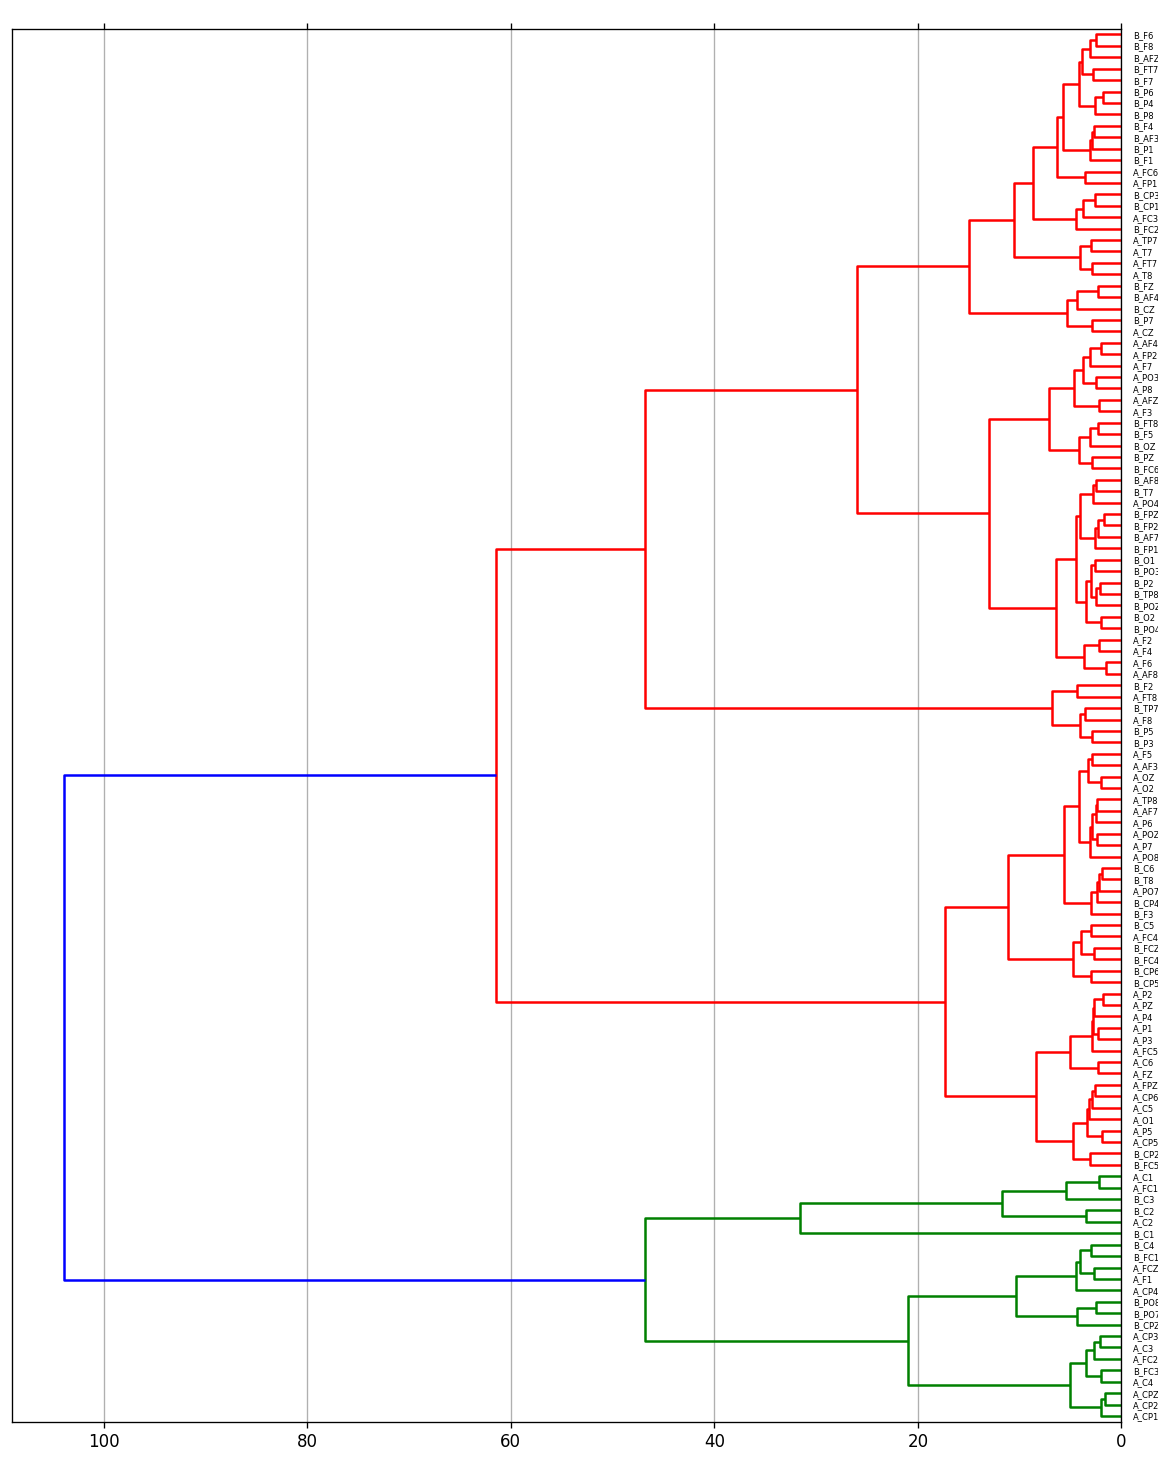

In [142]:
dendrogram(dn,dn.columns)